In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_excel("dbmi04.xls", dtype={'Ix':float,'Io':float,'Is':float,'LatEp':float,
                                        'LonEp':float,'LatIDP':float,'LonIDP':float})

df.head()

df.Ix = np.floor(df.Ix)
df.Is = np.floor(df.Is)
df.I0= np.floor(df.I0)

NDBMI04  NCPTI04   An   Me  Gi  Ora  Mi  Se       AE    Rt ...   LatIDP  \
0        1        1 -217  6.0 NaN  NaN NaN NaN  Etruria  CFTI ...      NaN   
1        2        1 -217  6.0 NaN  NaN NaN NaN  Etruria  CFTI ...      NaN   
2        3        2 -174  NaN NaN  NaN NaN NaN   Sabina  CFTI ...      NaN   
3        4        3 -100  NaN NaN  NaN NaN NaN  Picenum  CFTI ...      NaN   
4        5        4  -99  NaN NaN  NaN NaN NaN   Norcia  CFTI ...   42.793   

   LonIDP    Is  Cou     Istat01   Pr                 LocOr   LatOr   LonOr  \
0     NaN  10.0   IT         NaN  NaN               Etruria  43.250  11.250   
1     NaN   NaN   IT         NaN  NaN  Lago Trasimeno   [1]  43.133  12.108   
2     NaN  10.0   IT         NaN  NaN          Sabina   [1]  42.250  12.667   
3     NaN   8.5   IT         NaN  NaN         Picenum   [2]  43.167  13.500   
4  13.094   9.0   IT  10054035.0   PG            Norcia  PG  42.793  13.094   

  IsOr  
0  100  
1  NaN  
2  100  
3   85  
4   90  

[5 rows x 31 columns]

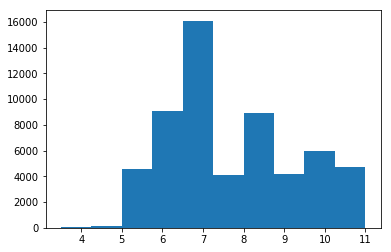

In [81]:
plt.hist(df.loc[~np.isnan(df.Io), "Io"])
plt.show()

In [82]:
def GeoDistance(lat1, lon1, lat2, lon2, unit):
    radlat1 = np.pi * lat1/180
    radlat2 = np.pi * lat2/180
    theta = lon1-lon2
    radtheta = np.pi * theta/180
    dist = np.sin(radlat1) * np.sin(radlat2) + np.cos(radlat1) * np.cos(radlat2) * np.cos(radtheta);
    dist = np.arccos(dist)
    dist = dist * 180/np.pi
    dist = dist * 60 * 1.1515

    if unit=="K":
            dist = dist * 1.609344
    if unit=="N":
            dist = dist * 0.8684
    return dist

In [173]:
nf = df[(~np.isnan(df.LonIDP) & ~np.isnan(df.LatIDP) & ~np.isnan(df.LatEp) & ~np.isnan(df.LonEp) )]
nf.index = range(len(nf.index))

R = GeoDistance(nf.LatEp,nf.LonEp,nf.LatIDP,nf.LonIDP, "k")

nf = nf.assign(R=R.values)
nf = nf[~np.isnan(R)]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys


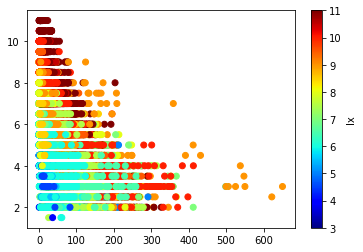

In [174]:
plt.scatter(nf.R,nf.Is, 
            c=nf.Ix, cmap='jet')
plt.colorbar(label="Ix")

#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.show()

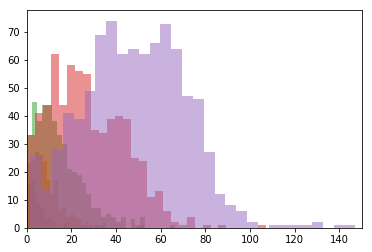

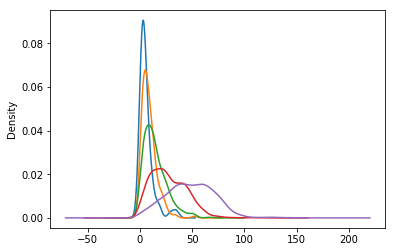

In [184]:
Imax = 10
temp = nf[nf.Ix == Imax]
bins=30
plt.xlim(0,150)

plt.hist(temp[temp.Is==Imax].R, alpha=0.5,bins=bins)
plt.hist(temp[temp.Is==Imax-1].R, alpha=0.5 ,bins=bins)
plt.hist(temp[temp.Is==Imax-2].R, alpha=0.5, bins=bins)
plt.hist(temp[temp.Is==Imax-3].R, alpha=0.5, bins=bins)
plt.hist(temp[temp.Is==Imax-4].R, alpha=0.5, bins=bins)
#plt.hist(nf.loc[nf.Is==Imax-5].R, alpha=0.5) 

plt.show()

temp[temp.Is==Imax].R.plot(kind='density')
temp[temp.Is==Imax-1].R.plot(kind='density')
temp[temp.Is==Imax-2].R.plot(kind='density')
temp[temp.Is==Imax-3].R.plot(kind='density')
temp[temp.Is==Imax-4].R.plot(kind='density')
#nf.loc[nf.Is==Imax-5].R.plot(kind='density')
#nf.loc[nf.Is==Imax-6].R.plot(kind='density')

In [170]:
len(R)

58019

In [171]:
len(nnf)

58019

In [172]:
R.values

array([ 0.57133351, 70.0378658 ,  3.68865321, ..., 14.43898989,
       15.13446257, 15.34219276])